In [1]:
import numpy as np
import pandas as pd

In [15]:
cctv = pd.read_csv('data/서울시 자치구 연도별 방범용 CCTV 운영 현황_230630기준.csv', encoding='EUC-KR', index_col='구분', thousands=',')
cctv.head(3)

,Unnamed: 0,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
구분,,,,,,,,,,
종로구,1,935,1066,1225,1322,1338,1526,1573,1812,1808
중구,2,363,565,838,1174,1234,1482,1911,2026,2026
용산구,3,1398,1689,1831,1888,1986,2131,2321,2531,2647


In [27]:
cctv.drop(index=['종로구'], inplace=True)

In [28]:
cctv.head(3)

,Unnamed: 0,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
구분,,,,,,,,,,
중구,2,363,565,838,1174,1234,1482,1911,2026,2026
용산구,3,1398,1689,1831,1888,1986,2131,2321,2531,2647
성동구,4,1089,1328,2103,2390,2697,3162,3519,3627,3643


In [29]:
cctv.drop(columns=['Unnamed: 0'])

,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
구분,,,,,,,,,
중구,363,565,838,1174,1234,1482,1911,2026,2026
용산구,1398,1689,1831,1888,1986,2131,2321,2531,2647
성동구,1089,1328,2103,2390,2697,3162,3519,3627,3643
광진구,638,657,1112,1586,2233,2375,3111,3370,3359
동대문구,1202,1425,1535,1775,1969,2142,2471,2592,2592
중랑구,751,898,1047,1203,2250,3165,3592,3856,3856
성북구,1035,1534,1940,2542,2895,3081,3815,4014,4129
강북구,608,840,841,1159,1656,2337,2960,3184,3184
도봉구,345,443,542,679,835,979,1684,1994,2120


In [11]:
cctv.drop(columns=['2023년'], inplace=True)
cctv.head(3)

,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
구분,,,,,,,,
종로구,935,1066,1225,1322,1338,1526,1573,1812
중구,363,565,838,1174,1234,1482,1911,2026
용산구,1398,1689,1831,1888,1986,2131,2321,2531


In [12]:
cctv['CCTV댓수'] = cctv.sum(axis=1)
cctv.head(3)

,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,CCTV댓수
구분,,,,,,,,,
종로구,935,1066,1225,1322,1338,1526,1573,1812,10797
중구,363,565,838,1174,1234,1482,1911,2026,9593
용산구,1398,1689,1831,1888,1986,2131,2321,2531,15775


In [13]:
cctv['최근증가율'] = (cctv.loc[:, '2020년':'2022년'].sum(axis=1) / cctv['CCTV댓수'] * 100).round(2)
cctv.head(3)

,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,CCTV댓수,최근증가율
구분,,,,,,,,,,
종로구,935,1066,1225,1322,1338,1526,1573,1812,10797,45.48
중구,363,565,838,1174,1234,1482,1911,2026,9593,56.49
용산구,1398,1689,1831,1888,1986,2131,2321,2531,15775,44.27


In [14]:
cctv.drop(columns='2015년	2016년	2017년	2018년	2019년	2020년	2021년	2022년'.split(), inplace=True)
cctv.head(3)

,CCTV댓수,최근증가율
구분,,
종로구,10797,45.48
중구,9593,56.49
용산구,15775,44.27


In [18]:
cctv.index.name = '구별'
cctv.head(3)

,CCTV댓수,최근증가율
구별,,
종로구,10797,45.48
중구,9593,56.49
용산구,15775,44.27


In [16]:
pop = pd.read_csv('data/서울시 구별 주민등록인구.csv', skiprows=1)
pop.head(3)

,동별(1),동별(2),세대 (세대),계 (명),한국인 (명),등록외국인 (명),세대당인구 (명),65세이상고령자 (명),세대 (세대).1,계 (명).1,한국인 (명).1,등록외국인 (명).1,인구밀도
0,합계,소계,4463385,9668008,9426404,241604,2.11,1690961,4469158,9659322,9414093,245229,2
1,합계,종로구,72679,152212,141060,11152,1.94,28265,72507,151349,140397,10952,2
2,합계,중구,63862,131390,120963,10427,1.89,25353,64375,132054,121441,10613,2


In [17]:
pop = pop[['동별(2)', '계 (명)', '한국인 (명)', '등록외국인 (명)', '65세이상고령자 (명)']]
pop.head(3)

,동별(2),계 (명),한국인 (명),등록외국인 (명),65세이상고령자 (명)
0,소계,9668008,9426404,241604,1690961
1,종로구,152212,141060,11152,28265
2,중구,131390,120963,10427,25353


In [24]:
pop.drop([0],inplace=True)
pop.head(3)

,동별(2),계 (명),한국인 (명),등록외국인 (명),65세이상고령자 (명)
1,종로구,152212,141060,11152,28265
2,중구,131390,120963,10427,25353
3,용산구,232482,217756,14726,39478


In [27]:
pop.columns = ['구별', '인구수','내국인','외국인','고령자']
pop.head(3)

,구별,인구수,내국인,외국인,고령자
1,종로구,152212,141060,11152,28265
2,중구,131390,120963,10427,25353
3,용산구,232482,217756,14726,39478


In [28]:
pop['외국인 비율'] = (pop['외국인'] / pop['인구수'] * 100).round(2)
pop['고령자 비율'] = (pop['고령자'] / pop['인구수'] * 100).round(2)
pop.head(3)

,구별,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,152212,141060,11152,28265,7.33,18.57
2,중구,131390,120963,10427,25353,7.94,19.30
3,용산구,232482,217756,14726,39478,6.33,16.98


In [29]:
pop.set_index('구별', inplace=True)
pop.head(3)

,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,
종로구,152212,141060,11152,28265,7.33,18.57
중구,131390,120963,10427,25353,7.94,19.30
용산구,232482,217756,14726,39478,6.33,16.98


In [30]:
df = pd.merge(cctv, pop, left_index=True, right_index=True)
df.head(3)

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
종로구,10797,45.48,152212,141060,11152,28265,7.33,18.57
중구,9593,56.49,131390,120963,10427,25353,7.94,19.30
용산구,15775,44.27,232482,217756,14726,39478,6.33,16.98


In [41]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'D2Coding'

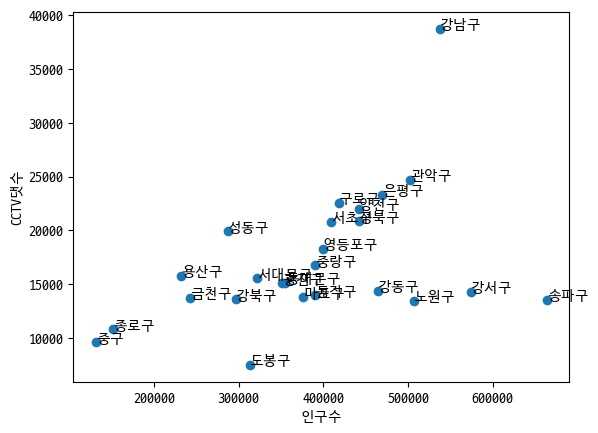

In [42]:
plt.scatter(df['인구수'], df['CCTV댓수'])
plt.xlabel('인구수')
plt.ylabel('CCTV댓수')
for i, label in enumerate(df.index):
    plt.text(df['인구수'][i], df['CCTV댓수'][i], label) 
plt.show()